In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Eating Habits Attributes:
#### FAVC (Frequent consumption of high caloric food): Indicates if the individual frequently eats high caloric food.
#### FCVC (Frequency of consumption of vegetables): Reflects how often the individual consumes vegetables.
#### NCP (Number of main meals): Represents the number of main meals the individual has in a day.
#### CAEC (Consumption of food between meals): Shows how frequently the individual eats between meals.
#### CH20 (Consumption of water daily): Details the daily water consumption.
#### CALC (Consumption of alcohol): Provides information on the individual's alcohol consumption.
### Physical Condition Attributes:
#### SCC (Calories consumption monitoring): Indicates if the individual monitors their calorie intake.
#### FAF (Physical activity frequency): Reflects the frequency of physical activity.
#### TUE (Time using technology devices): Denotes the time spent using technology devices.
#### MTRANS (Transportation used): Details the primary mode of transportation.

In [3]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/840/original/ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
num_df = df.select_dtypes(include = "float64")
num_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


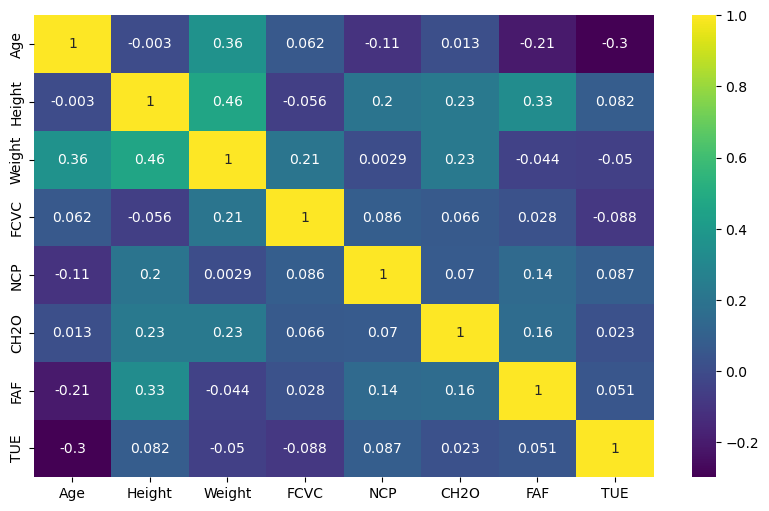

In [9]:
plt.figure(figsize = (10,6))
sns.heatmap(num_df.corr(method = 'spearman'), annot=True, cmap='viridis')
plt.show()

In [10]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

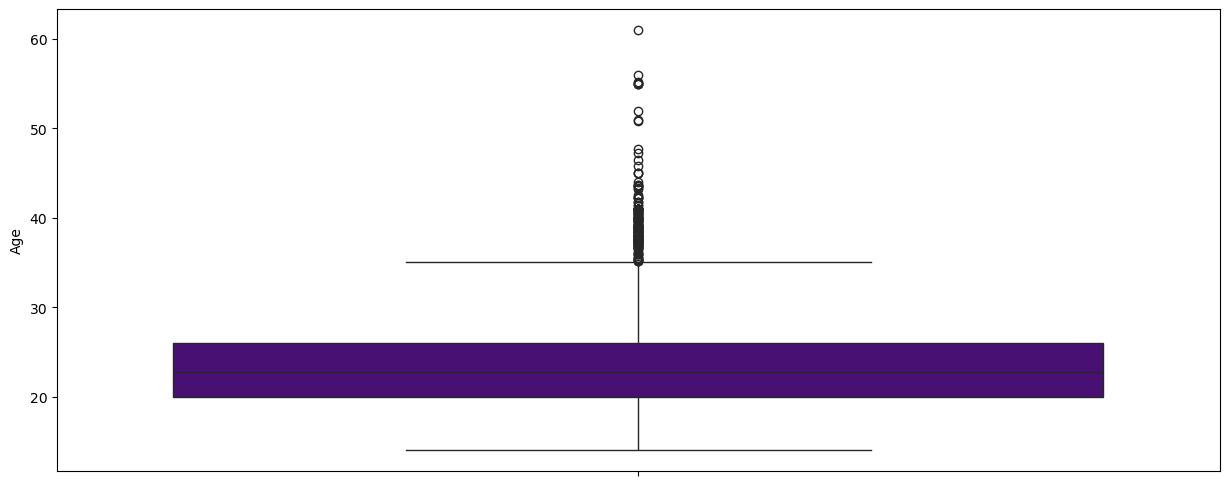

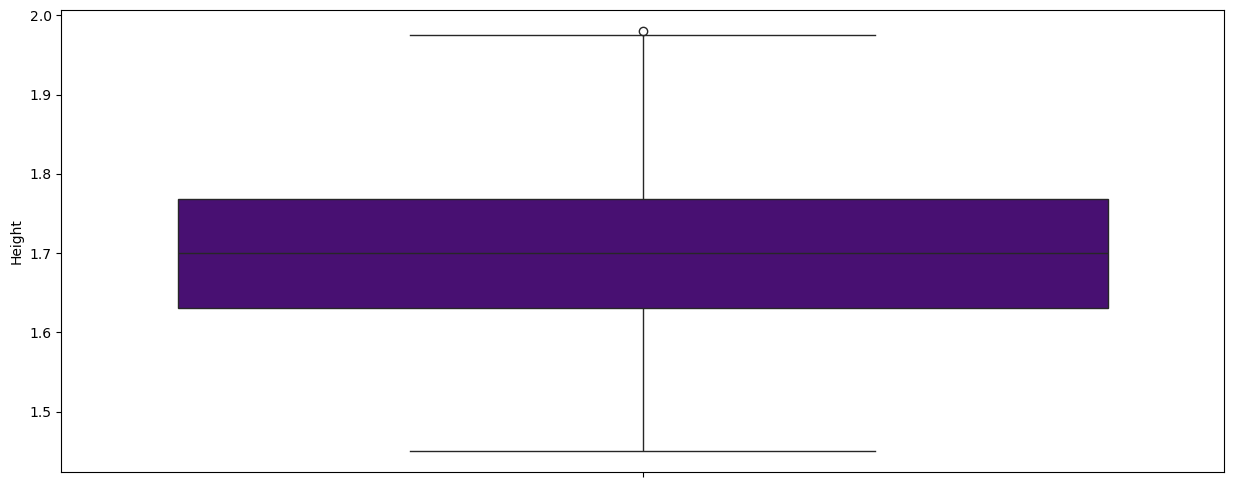

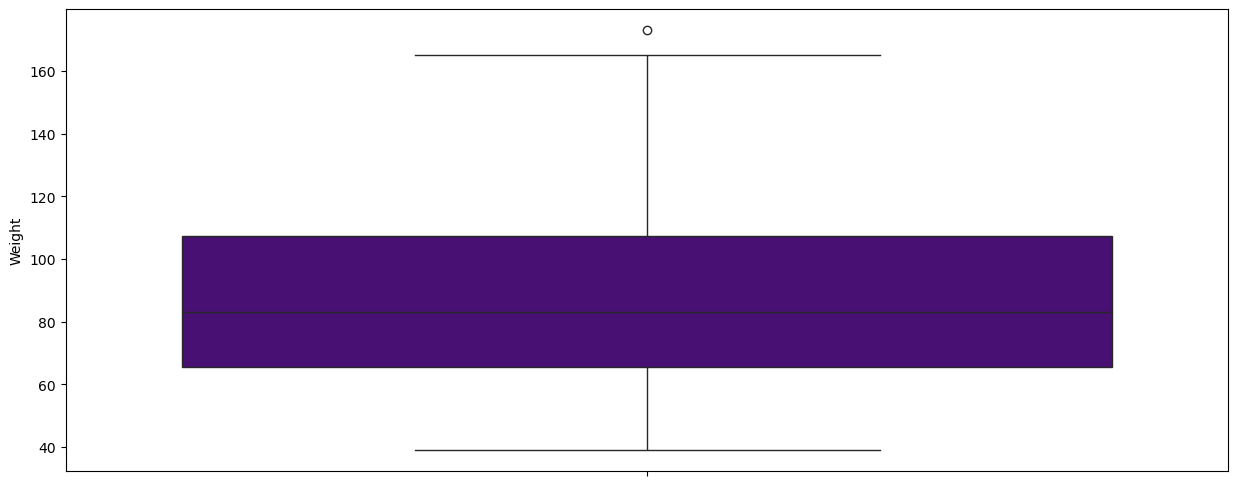

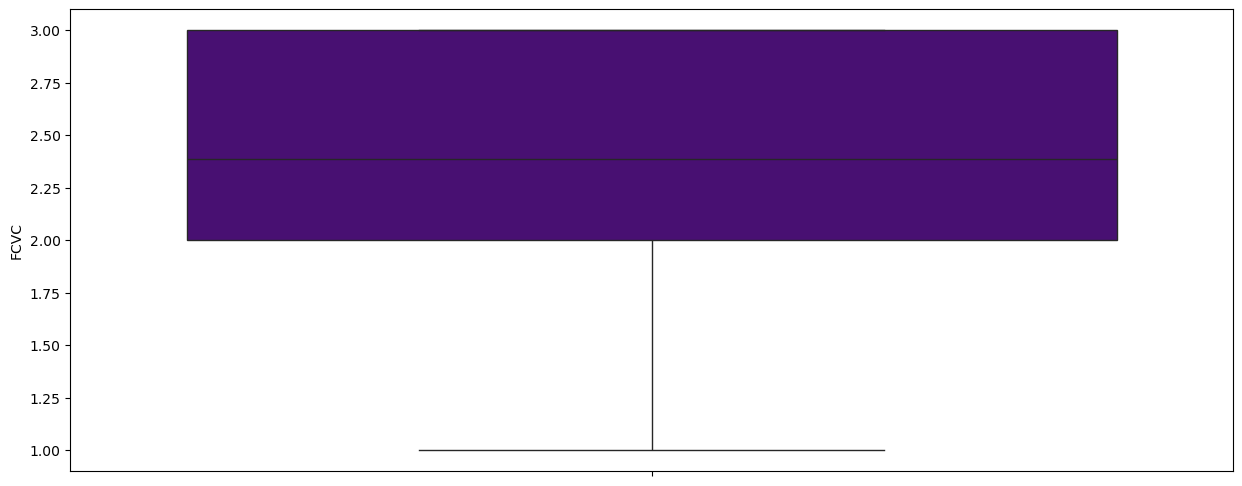

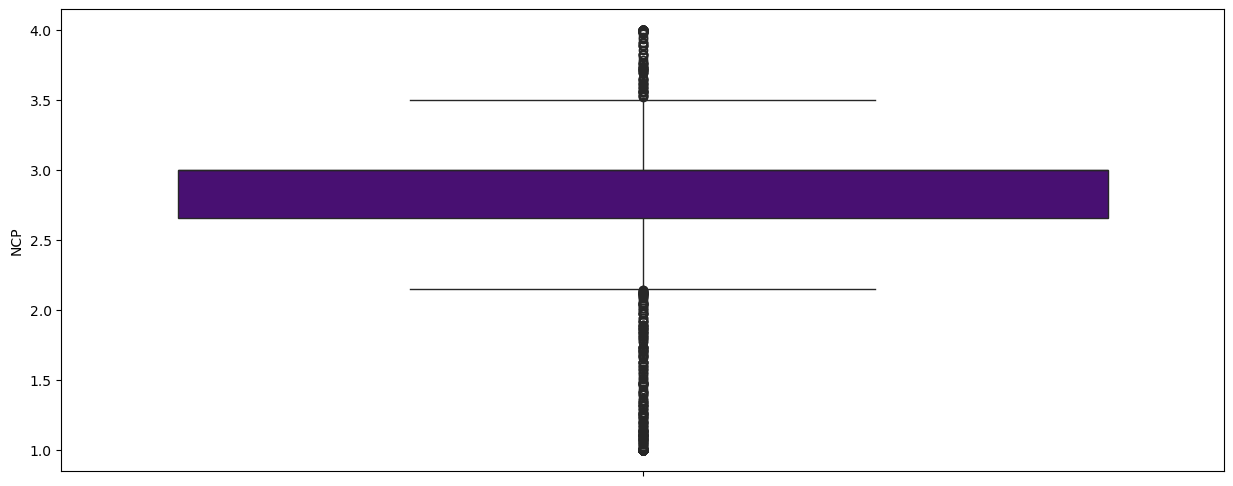

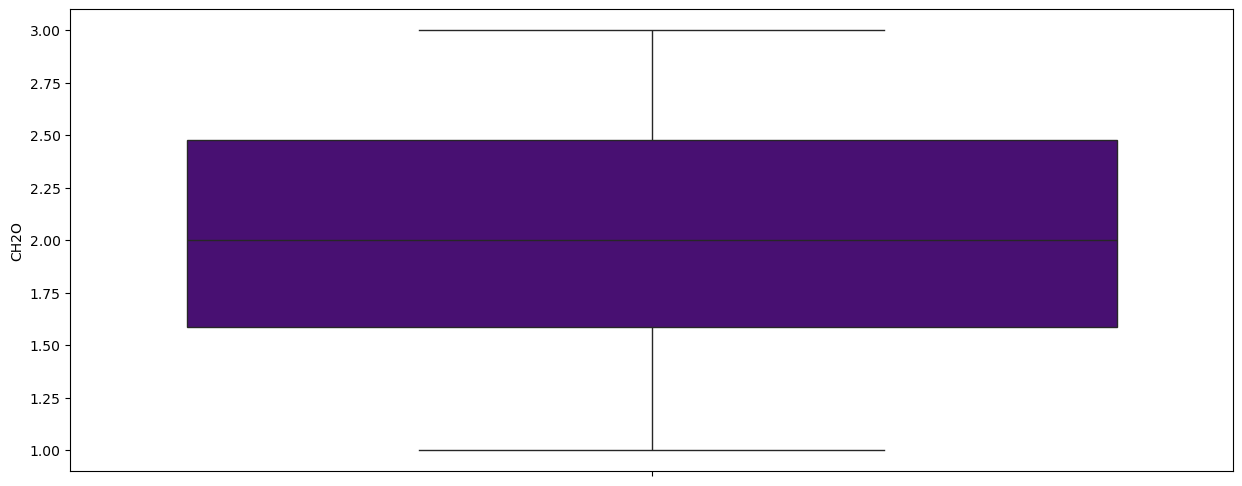

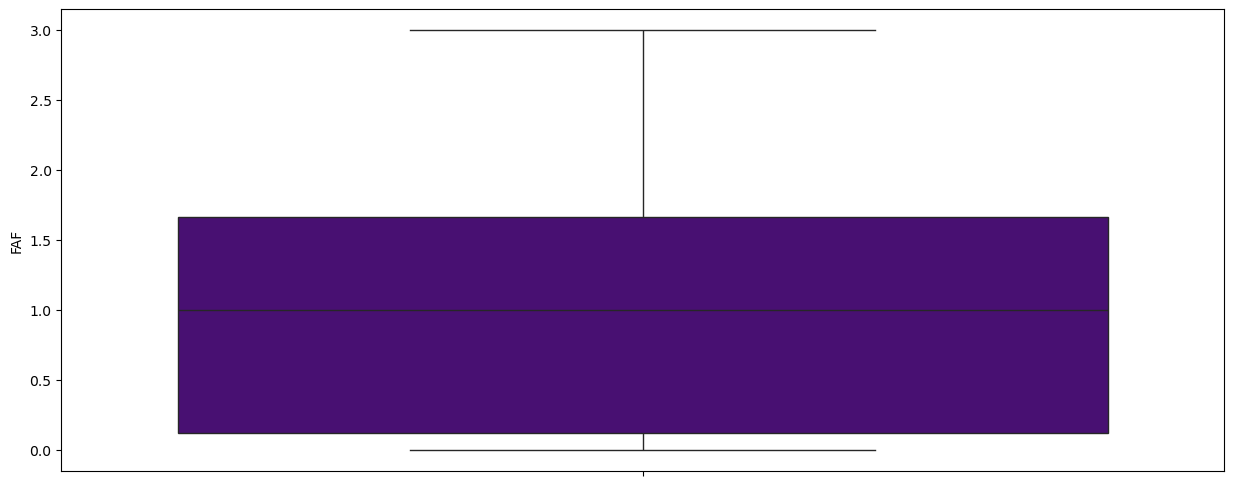

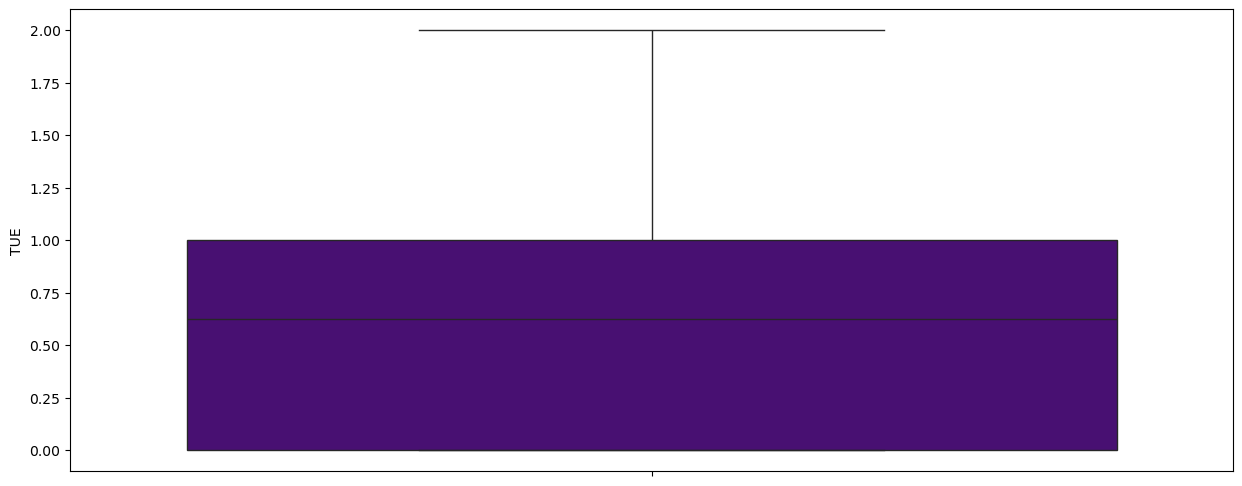

In [11]:
for i in num_df.columns:
    plt.figure(figsize = (15,6))
    sns.boxplot(df, y = df[i],color = 'indigo')
    plt.show()

In [12]:
from scipy import stats

z_scores = np.abs(stats.zscore(num_df))
threshold = 3
outliers = (z_scores > threshold)

In [13]:
outliers.shape

(2111, 8)

In [14]:
df['Age'].min(),df['Age'].max()

(14.0, 61.0)

In [15]:
bins = [14,21,28,35,42,50,61]
labels = ['<20','21-28','28-35','35-42','42-50','50+']
df["age_bracket"] = pd.cut(df["Age"],
       bins = bins,
       labels = labels,right=False)

In [16]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_bracket
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,21-28
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,21-28
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,21-28
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,21-28
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,21-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,<20
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,21-28
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,21-28
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,21-28


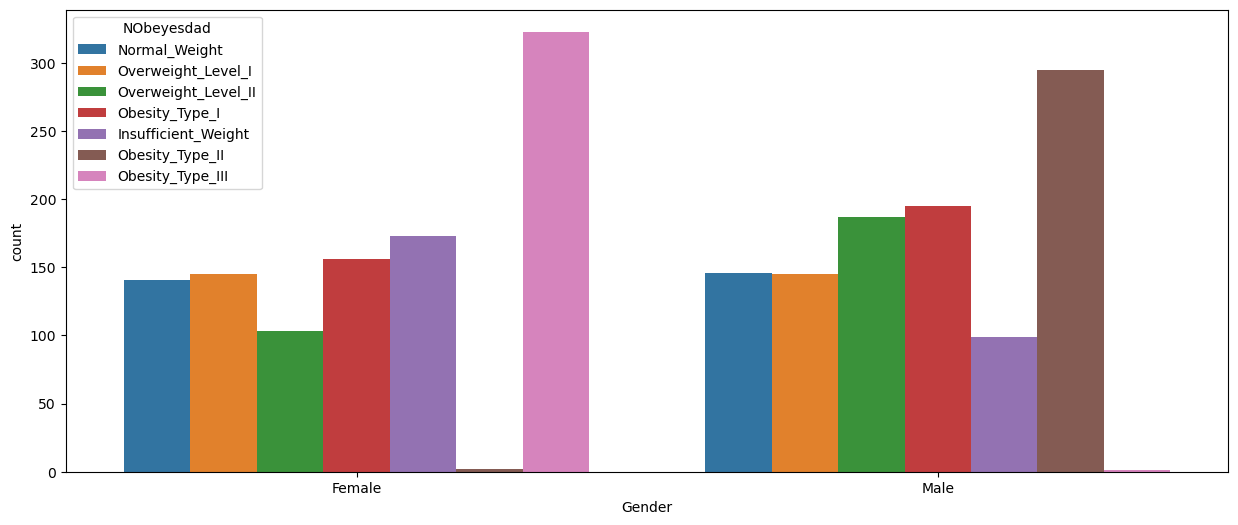

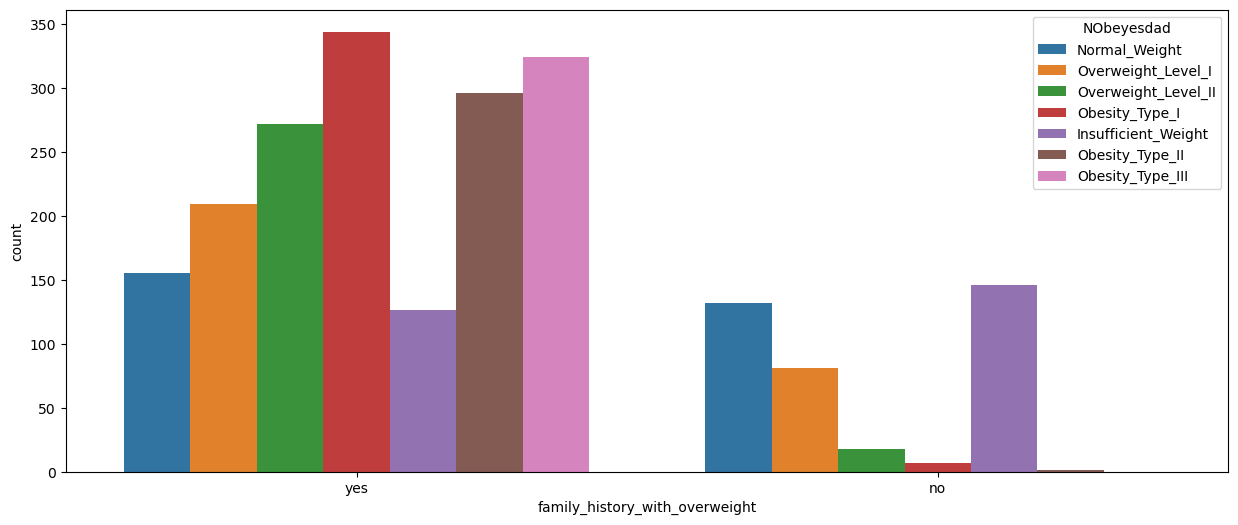

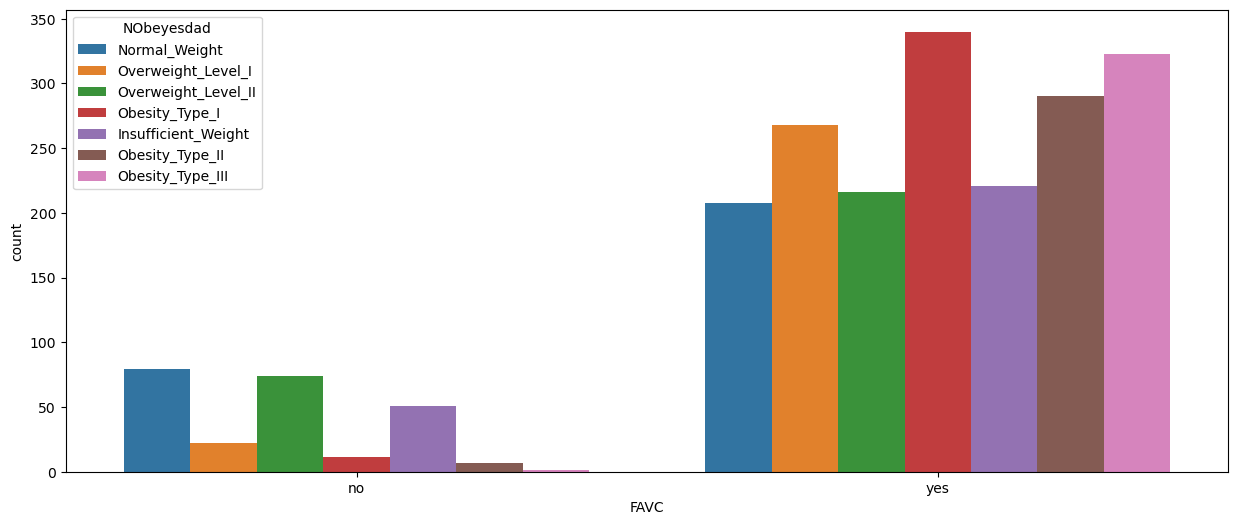

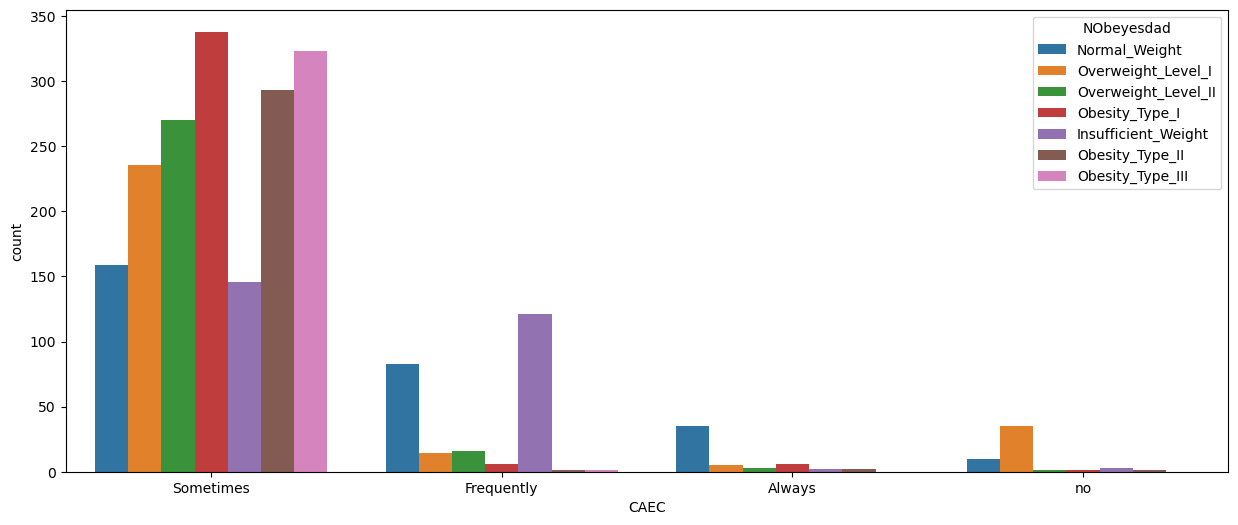

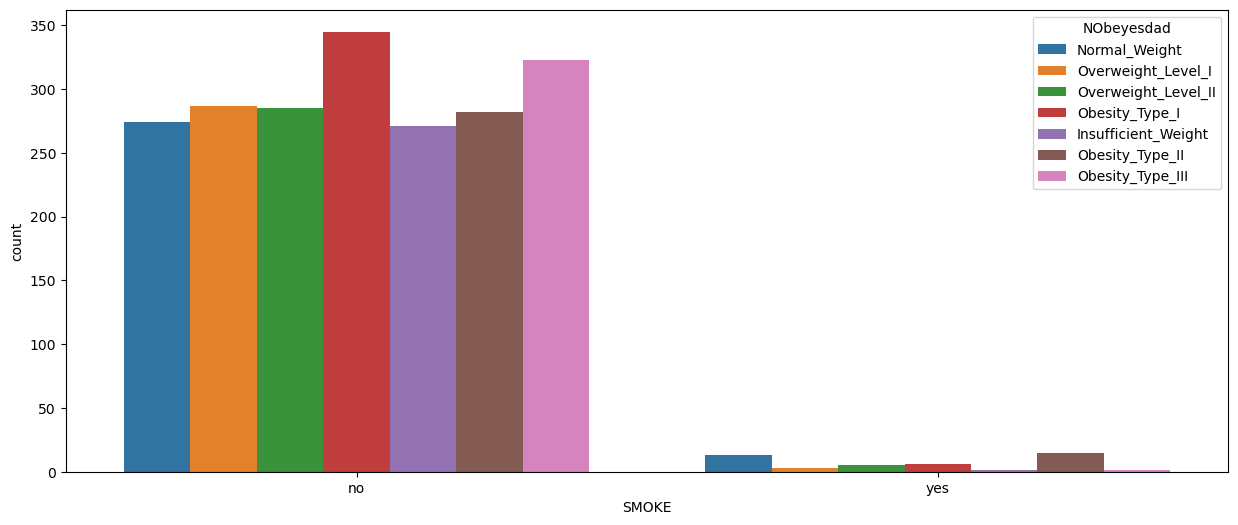

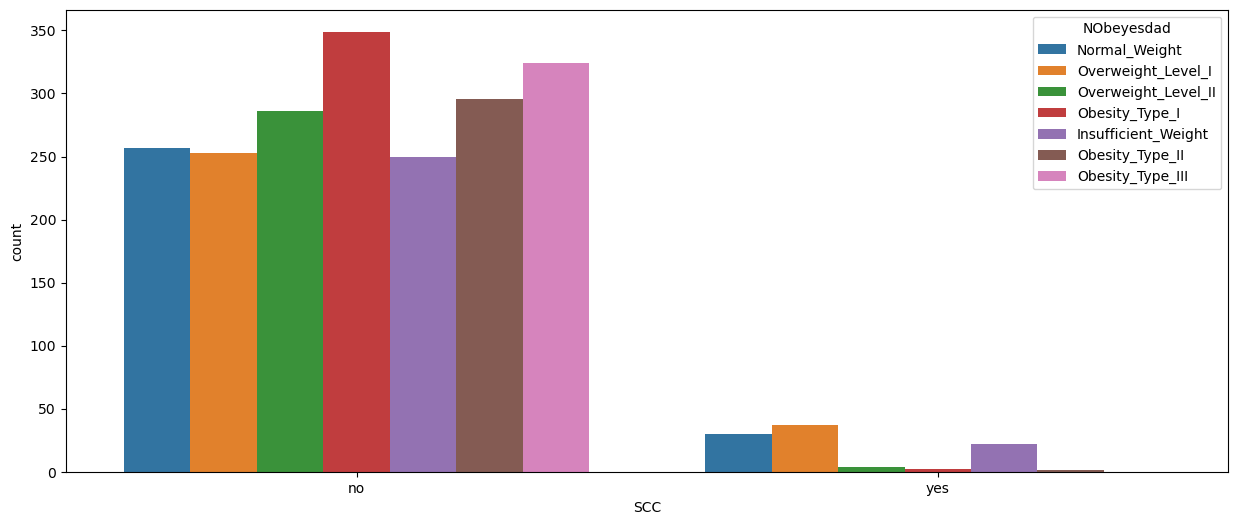

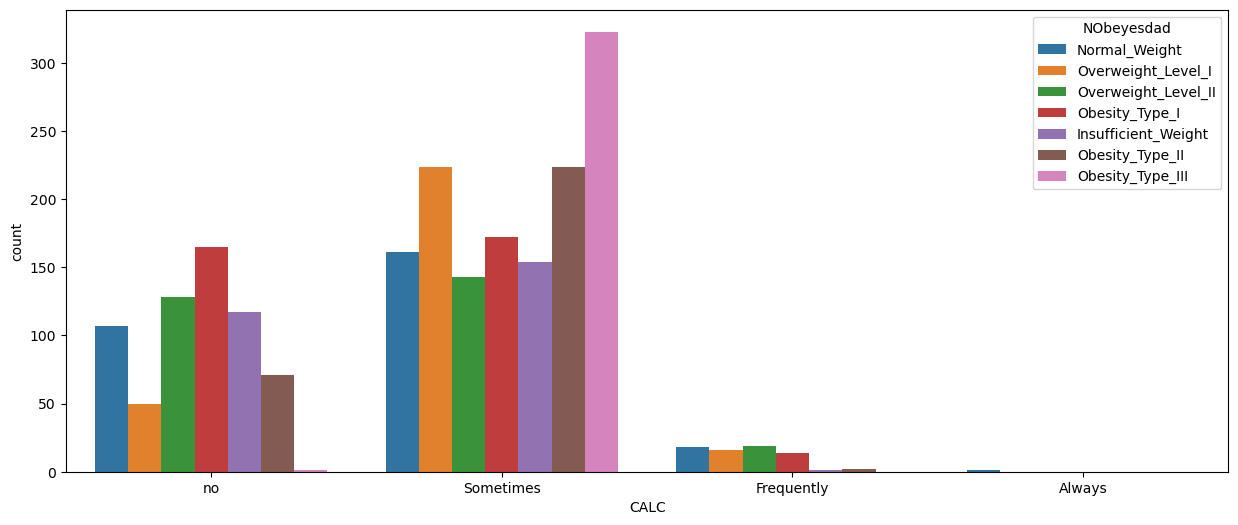

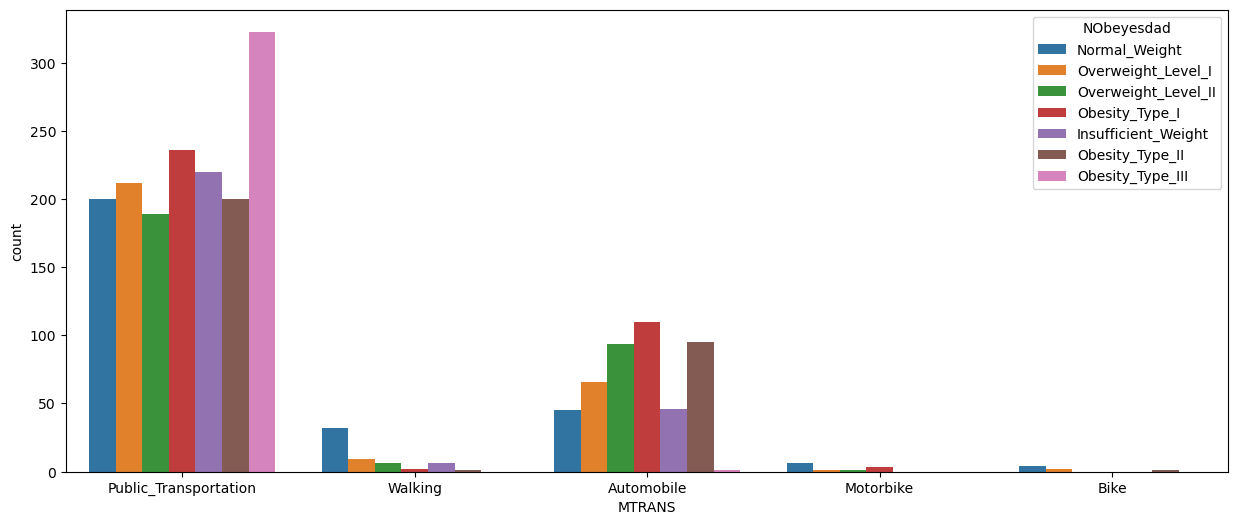

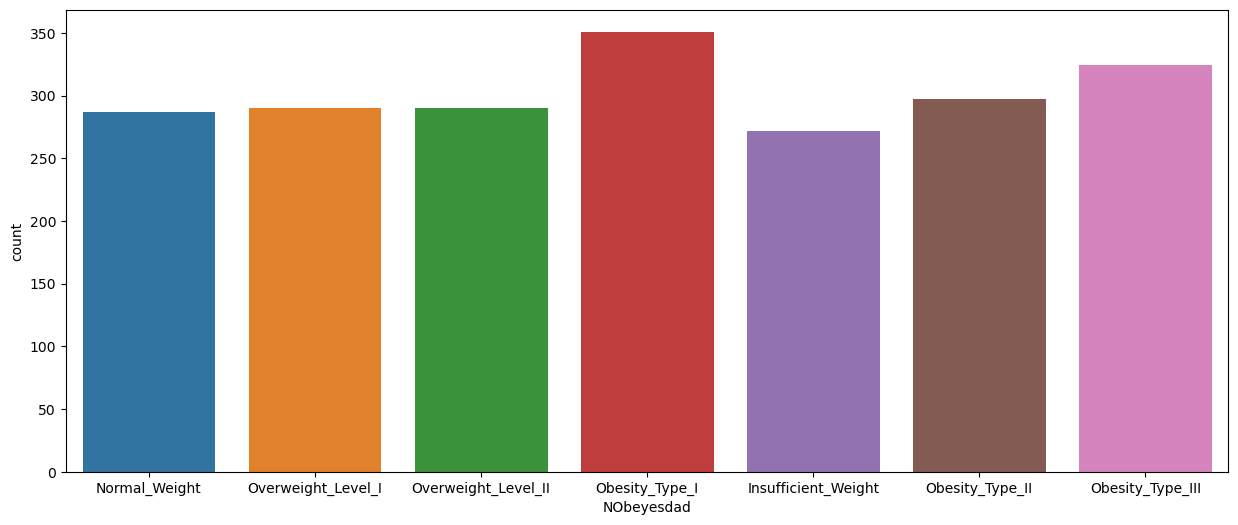

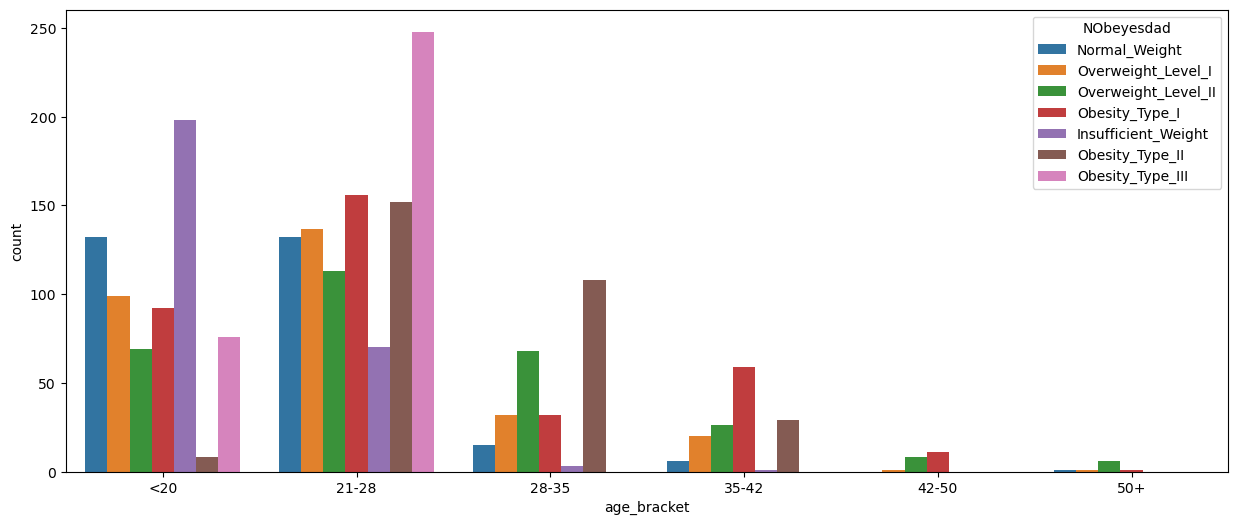

In [17]:
list = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
for i in df.columns:
    if i not in list:
        plt.figure(figsize = (15,6))
        sns.countplot(df, x = df[i],hue = "NObeyesdad")
        plt.show()

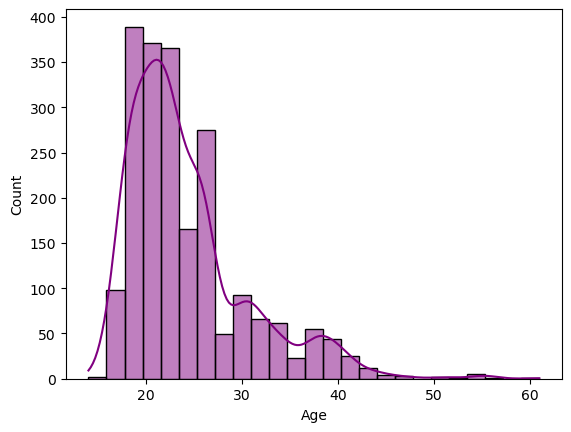

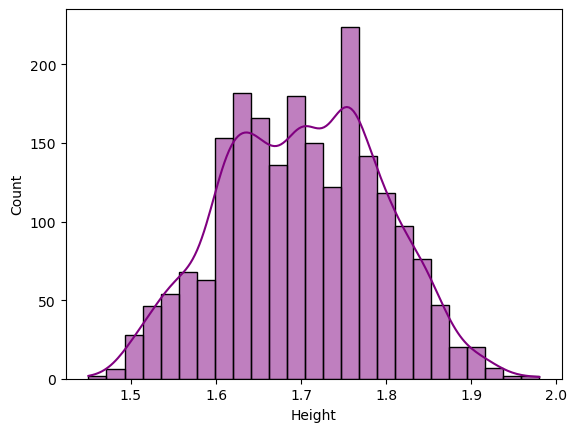

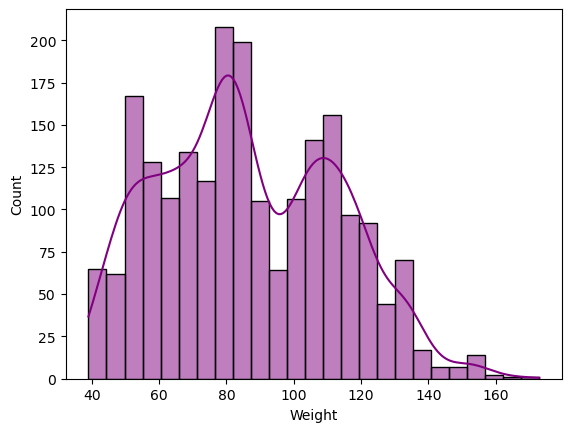

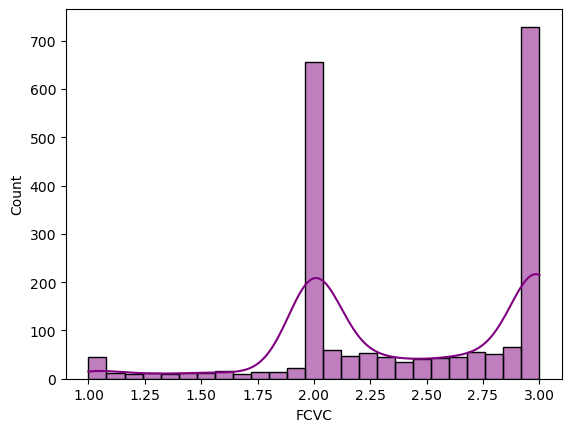

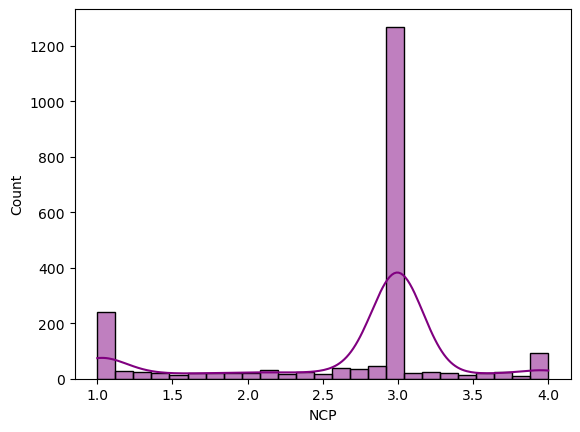

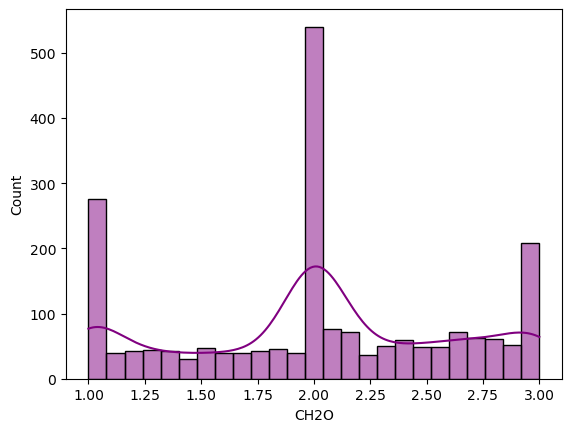

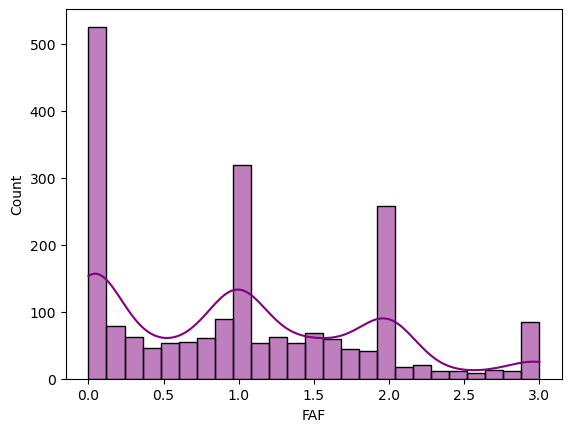

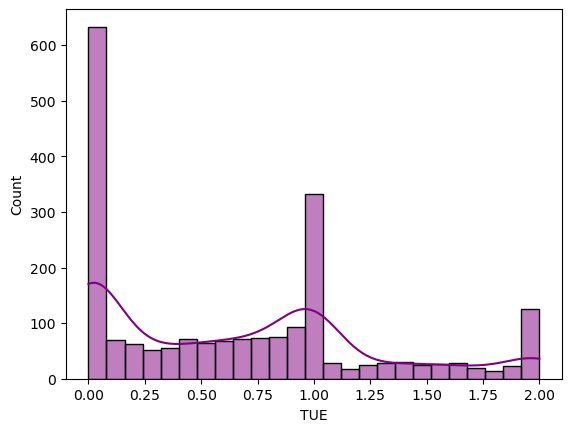

In [18]:
for i in num_df.columns:
    plt.figure()
    sns.histplot(num_df[i], bins=25, kde=True, color='purple')

In [19]:
num_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

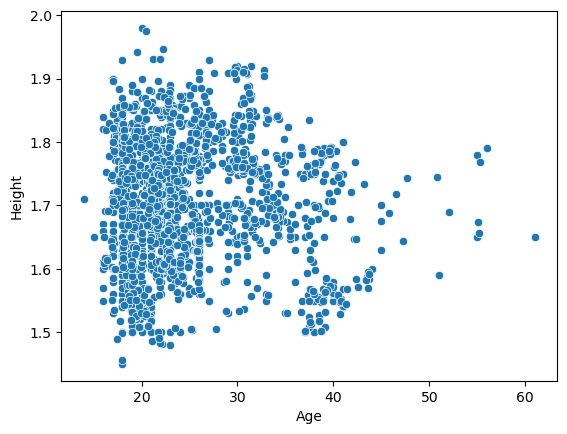

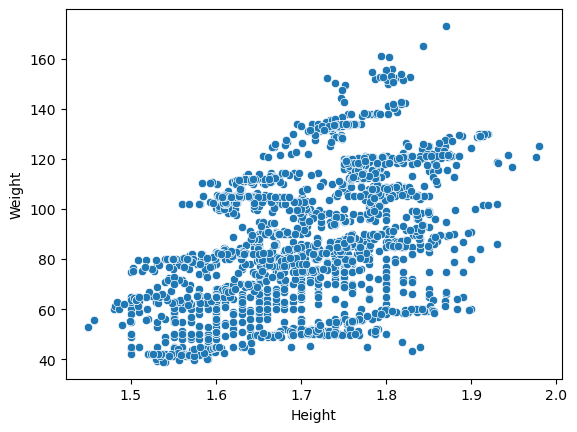

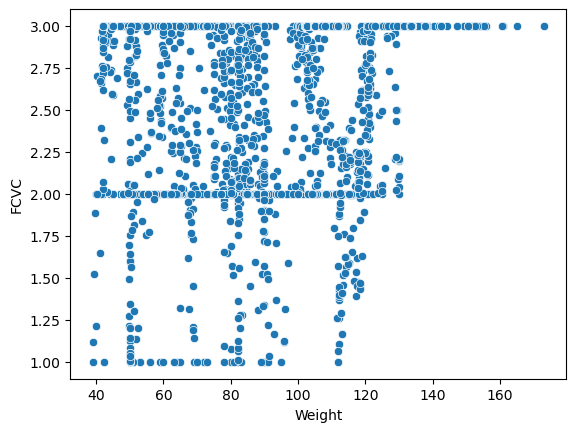

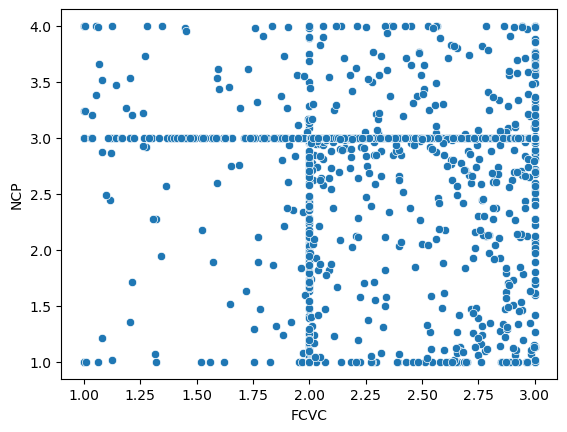

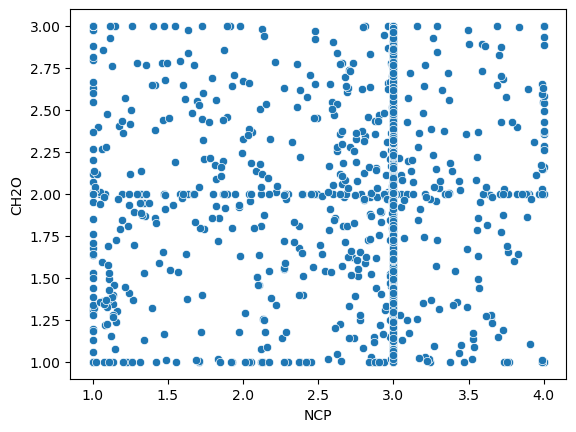

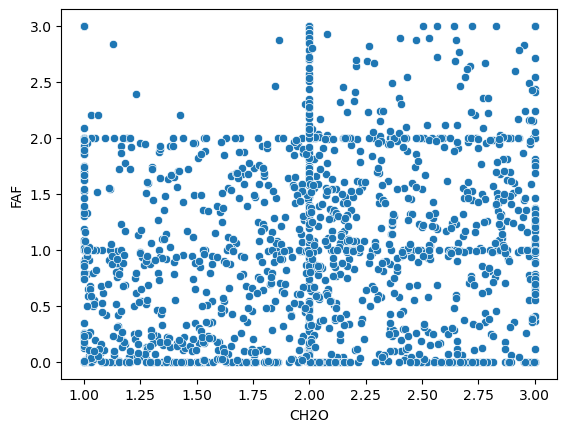

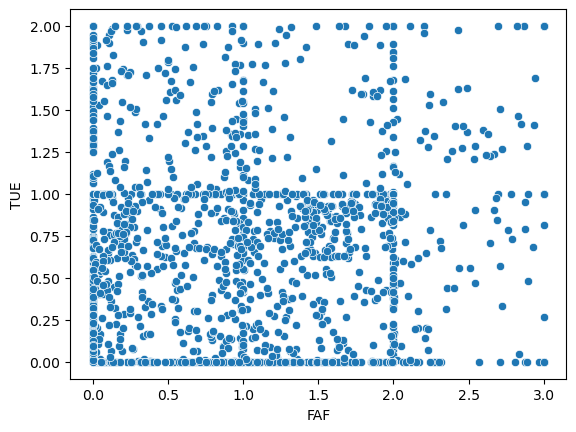

In [20]:
for i in range(len(num_df.columns)-1):
    sns.scatterplot(num_df,x = num_df.columns[i], y = num_df.columns[i+1])
    plt.show()
    i+=1

In [21]:
df.drop("age_bracket",axis = 1, inplace = True)

In [22]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
df["NObeyesdad"].value_counts(normalize = True)*100

NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64

In [24]:
for i in df.select_dtypes(include = 'object').columns:
    print(f"{i}_unique_values = {df[i].unique()},{df[i].nunique()}")

Gender_unique_values = ['Female' 'Male'],2
family_history_with_overweight_unique_values = ['yes' 'no'],2
FAVC_unique_values = ['no' 'yes'],2
CAEC_unique_values = ['Sometimes' 'Frequently' 'Always' 'no'],4
SMOKE_unique_values = ['no' 'yes'],2
SCC_unique_values = ['no' 'yes'],2
CALC_unique_values = ['no' 'Sometimes' 'Frequently' 'Always'],4
MTRANS_unique_values = ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'],5
NObeyesdad_unique_values = ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'],7


In [25]:
columns = ['FCVC','NCP','CH2O','FAF','TUE']
for i in columns:
    print(f"{i} : {df[i].nunique()}")

FCVC : 810
NCP : 635
CH2O : 1268
FAF : 1190
TUE : 1129


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df.select_dtypes(include = 'object').columns:
    if df[i].nunique()==2:
        df[i] = label_encoder.fit_transform(df[i])     

In [27]:
df.select_dtypes(include = 'object')

,CAEC,CALC,MTRANS,NObeyesdad
0,Sometimes,no,Public_Transportation,Normal_Weight
1,Sometimes,Sometimes,Public_Transportation,Normal_Weight
2,Sometimes,Frequently,Public_Transportation,Normal_Weight
3,Sometimes,Frequently,Walking,Overweight_Level_I
4,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...
2106,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2107,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2108,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2109,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III


In [28]:
df_copy = df.copy()
df_copy.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [29]:
dummies = ['CAEC', 'CALC', 'MTRANS','NObeyesdad']
df_copy = pd.get_dummies(df_copy, columns=dummies,drop_first = True)

In [30]:
for col in df_copy.columns:
    if df_copy[col].dtype == bool:
        df_copy[col] = df_copy[col].astype(int)

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_copy.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,0.0,1.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,3.0,0.0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,2.0,1.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,2.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,0.0,0.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [32]:
df_copy.shape

(2111, 29)

### scaling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X = df_copy.iloc[:, :-6]
Y = df_copy.iloc[:, -6:]

In [36]:
y_one_hot = np.array(Y)
y_one_hot

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]])

In [37]:
y = np.argmax(y_one_hot, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [39]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, Y_train)

In [42]:
scaler = StandardScaler()
scaler.fit(X_sm)

X_sm = scaler.transform(X_sm)
X_test = scaler.transform(X_test)

In [43]:
X_sm.shape

(2196, 23)

In [44]:
y_sm.shape

(2196,)

In [217]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

model = KNeighborsClassifier()

score = cross_val_score(model,X_sm,y_sm,cv = kfold)

print(score)
print(f"Mean of score: {np.mean(score)}")
print(f"Best score: {max(score)}")

[0.88409091 0.88610478 0.8929385  0.85876993 0.8952164 ]
Mean of score: 0.8834241043694346
Best score: 0.8952164009111617


In [219]:
mean_cv_scores = []
hyper = []

for k in np.arange(1,101):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model,X_sm,y_sm,cv = kfold)
    mean_cv_scores.append(np.mean(score))
    hyper.append(k)
    
print(hyper[np.argmax(mean_cv_scores)])

1


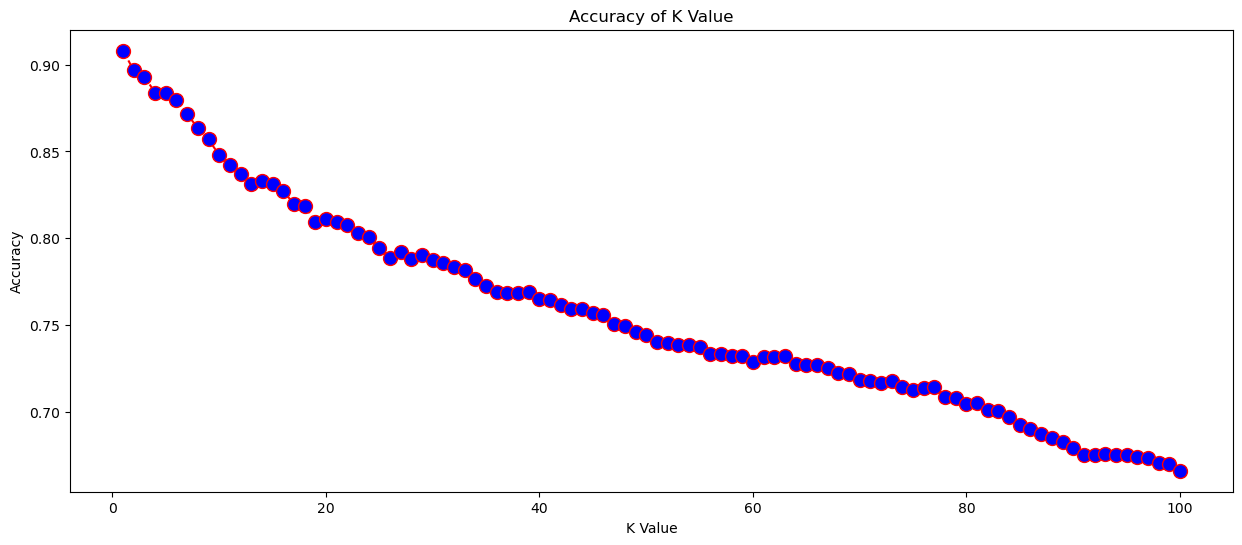

In [220]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 101), mean_cv_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [221]:
from sklearn.metrics import accuracy_score 

metrics = ['euclidean', 'manhattan', 'cosine']
scores = {}


for metric in metrics: 
    model = KNeighborsClassifier(metric=metric)
    mean_cv_score = np.mean(cross_val_score(model,X_sm,y_sm,cv = kfold))
    scores[metric] = mean_cv_score
    print(f"Accuracy with {metric} distance: {mean_cv_score}")

best_metric = max(scores, key=scores.get)
print(f"The best-performing metric is {best_metric} with an accuracy of {scores[best_metric]}.")

Accuracy with euclidean distance: 0.8834241043694346
Accuracy with manhattan distance: 0.919859184096086
Accuracy with cosine distance: 0.8820594325947401
The best-performing metric is manhattan with an accuracy of 0.919859184096086.


In [295]:
knn_best = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')

knn_best.fit(X_sm,y_sm)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [297]:
y_train_pred = knn_best.predict(X_sm)

In [299]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,precision_recall_curve,roc_curve,roc_auc_score,auc

print(accuracy_score(y_sm,y_train_pred))
print(classification_report(y_sm,y_train_pred))

0.9380692167577414
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       366
           1       0.92      0.97      0.94       366
           2       0.98      0.98      0.98       366
           3       0.99      1.00      1.00       366
           4       0.92      0.89      0.90       366
           5       0.92      0.91      0.92       366

    accuracy                           0.94      2196
   macro avg       0.94      0.94      0.94      2196
weighted avg       0.94      0.94      0.94      2196



In [301]:
test_accuracy = knn_best.score(X_test, Y_test)
test_accuracy

0.8593974175035868

In [303]:
y_test_pred = knn_best.predict(X_test)

print(accuracy_score(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))

0.8593974175035868
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       193
           1       0.84      0.87      0.85       114
           2       0.89      0.98      0.93        94
           3       0.98      0.99      0.99       115
           4       0.71      0.80      0.75        94
           5       0.81      0.82      0.81        87

    accuracy                           0.86       697
   macro avg       0.85      0.87      0.86       697
weighted avg       0.86      0.86      0.86       697

